In [1]:
!pip install --upgrade gensim


   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.0 MB 8.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.8/24.0 MB 4.6 MB/s eta 0:00:05
   ---- ----------------------------------- 2.9/24.0 MB 4.3 MB/s eta 0:00:05
   ------ --------------------------------- 3.7/24.0 MB 4.2 MB/s eta 0:00:05
   ------ --------------------------------- 4.2/24.0 MB 4.1 MB/s eta 0:00:05
   -------- ------------------------------- 5.2/24.0 MB 4.1 MB/s eta 0:00:05
   ---------- ----------------------------- 6.0/24.0 MB 4.1 MB/s eta 0:00:05
   ----------- ---------------------------- 7.1/24.0 MB 4.0 MB/s eta 0:00:05
   ------------- -------------------------- 7.9/24.0 MB 4.0 MB/s eta 0:00:05
   -------------- ------------------------- 8.7/24.0 MB 4.0 MB/s eta 0:00:04
   --------------- ------------------------ 9.4/24.0 MB 4.0 MB/s eta 0:00:04
   ----------------- ---------------------- 10.2/24.0 MB 4.0 MB/s eta 0:00:04
   --

In [ ]:

def read_all_files(paths):
    corpus = ""
    for path in paths:
        with open(path, "r") as file:
            corpus += file.read()
    return corpus

In [8]:
paths = ["D:\\development\\generative_ai_krish\\assignments\\archive\\01 Harry Potter and the Sorcerers Stone.txt",
         "D:\\development\\generative_ai_krish\\assignments\\archive\\02 Harry Potter and the Chamber of Secrets.txt"]
corpus = read_all_files(paths=paths)

In [10]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.7 MB/s eta 0:00:00


In [11]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\vaibhav\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\vaibhav\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\vaibhav\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\vaibhav\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\vaibhav\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |  

True

In [28]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [29]:
sentences = sent_tokenize(corpus)

In [16]:
sentences

['M r. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.',
 'They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.',
 'Mr. Dursley was the director of a firm called Grunnings, which made drills.',
 'He was a big, beefy man with hardly any neck, although he did have a very large mustache.',
 'Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.',
 'The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.',
 'The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.',
 'They didn’t think they could bear it if anyone found out about the Potters.',
 'Mrs. Potter was Mrs. Dursley’s sister, bu

In [30]:
# Remove stop words
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')

In [31]:
english_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
# Remove stop words
def remove_stopwords(sentences):
    cleaned_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        filtered_words = [word for word in words if word.lower() not in english_stopwords]
        cleaned_sentences.append(' '.join(filtered_words))
    return cleaned_sentences

In [45]:
def test_stopwords():
    sentences = ["he is vaibhav","he is begineer in AI","I am vaibhav"]
    filtered_sentences = remove_stopwords(sentences=sentences)
    print(filtered_sentences)

In [46]:
test_stopwords()

['vaibhav', 'begineer AI', 'vaibhav']


In [47]:
filtered_sentences = remove_stopwords(sentences=sentences)

In [48]:
filtered_sentences

['r. Mrs. Dursley , number four , Privet Drive , proud say perfectly normal , thank much .',
 'last people ’ expect involved anything strange mysterious , ’ hold nonsense .',
 'Mr. Dursley director firm called Grunnings , made drills .',
 'big , beefy man hardly neck , although large mustache .',
 'Mrs. Dursley thin blonde nearly twice usual amount neck , came useful spent much time craning garden fences , spying neighbors .',
 'Dursleys small son called Dudley opinion finer boy anywhere .',
 'Dursleys everything wanted , also secret , greatest fear somebody would discover .',
 '’ think could bear anyone found Potters .',
 'Mrs. Potter Mrs. Dursley ’ sister , ’ met several years ; fact , Mrs. Dursley pretended ’ sister , sister good-for-nothing husband unDursleyish possible .',
 'Dursleys shuddered think neighbors would say Potters arrived street .',
 'Dursleys knew Potters small son , , never even seen .',
 'boy another good reason keeping Potters away ; ’ want Dudley mixing child lik

In [75]:
# Perform Lemmatization
from nltk.stem import WordNetLemmatizer

def lemmatize_sentences(sentences):
    lemmatized_sentences = []
    for sentence in sentences:
        lemmatizer = WordNetLemmatizer()
        tokens = word_tokenize(sentence)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
        lemmatized_sentences.append(' '.join(lemmatized_words))
    return lemmatized_sentences



In [77]:
def test_lemmatize_senteces():
    sentences_custom = ["The leaves are falling, and the children are running happily."]
    lemmatized_sentences = lemmatize_sentences(sentences_custom)
    print(lemmatized_sentences)

In [78]:
test_lemmatize_senteces()

['The leaf are falling , and the child are running happily .']


In [79]:
lemmatized_sentences = lemmatize_sentences(filtered_sentences)

In [81]:
lemmatized_sentences

['r. Mrs. Dursley , number four , Privet Drive , proud say perfectly normal , thank much .',
 'last people ’ expect involved anything strange mysterious , ’ hold nonsense .',
 'Mr. Dursley director firm called Grunnings , made drill .',
 'big , beefy man hardly neck , although large mustache .',
 'Mrs. Dursley thin blonde nearly twice usual amount neck , came useful spent much time craning garden fence , spying neighbor .',
 'Dursleys small son called Dudley opinion finer boy anywhere .',
 'Dursleys everything wanted , also secret , greatest fear somebody would discover .',
 '’ think could bear anyone found Potters .',
 'Mrs. Potter Mrs. Dursley ’ sister , ’ met several year ; fact , Mrs. Dursley pretended ’ sister , sister good-for-nothing husband unDursleyish possible .',
 'Dursleys shuddered think neighbor would say Potters arrived street .',
 'Dursleys knew Potters small son , , never even seen .',
 'boy another good reason keeping Potters away ; ’ want Dudley mixing child like .',

In [82]:
# remove puncuations
import string

def remove_punctuation(sentences):
    filtered_sentences = []
    for sentence in sentences:
        filtered_sentences.append(sentence.translate(str.maketrans('', '', string.punctuation)))
    return filtered_sentences

In [83]:
def test_remove_punctuation():
    sentences = ["Hi! How's it going?","aren't you hungry?"]
    filtered_sentences = remove_punctuation(sentences)
    print(filtered_sentences)

In [84]:
test_remove_punctuation()

['Hi Hows it going', 'arent you hungry']


In [85]:
punctuations_removed_sentences = remove_punctuation(lemmatized_sentences)

In [86]:
punctuations_removed_sentences

['r Mrs Dursley  number four  Privet Drive  proud say perfectly normal  thank much ',
 'last people ’ expect involved anything strange mysterious  ’ hold nonsense ',
 'Mr Dursley director firm called Grunnings  made drill ',
 'big  beefy man hardly neck  although large mustache ',
 'Mrs Dursley thin blonde nearly twice usual amount neck  came useful spent much time craning garden fence  spying neighbor ',
 'Dursleys small son called Dudley opinion finer boy anywhere ',
 'Dursleys everything wanted  also secret  greatest fear somebody would discover ',
 '’ think could bear anyone found Potters ',
 'Mrs Potter Mrs Dursley ’ sister  ’ met several year  fact  Mrs Dursley pretended ’ sister  sister goodfornothing husband unDursleyish possible ',
 'Dursleys shuddered think neighbor would say Potters arrived street ',
 'Dursleys knew Potters small son   never even seen ',
 'boy another good reason keeping Potters away  ’ want Dudley mixing child like ',
 'Mr Mrs Dursley woke dull  gray Tuesda

In [102]:
# word tokenizer

def get_word_sentence_tokens(sentences):
    sentence_word_tokens = []
    for sentence in punctuations_removed_sentences:
        tokens = word_tokenize(sentence)
        sentence_word_tokens.append(tokens)
    return sentence_word_tokens
    

In [104]:
sentence_tokens = get_word_sentence_tokens(punctuations_removed_sentences)

In [105]:
print(sentence_tokens)

[['r', 'Mrs', 'Dursley', 'number', 'four', 'Privet', 'Drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much'], ['last', 'people', '’', 'expect', 'involved', 'anything', 'strange', 'mysterious', '’', 'hold', 'nonsense'], ['Mr', 'Dursley', 'director', 'firm', 'called', 'Grunnings', 'made', 'drill'], ['big', 'beefy', 'man', 'hardly', 'neck', 'although', 'large', 'mustache'], ['Mrs', 'Dursley', 'thin', 'blonde', 'nearly', 'twice', 'usual', 'amount', 'neck', 'came', 'useful', 'spent', 'much', 'time', 'craning', 'garden', 'fence', 'spying', 'neighbor'], ['Dursleys', 'small', 'son', 'called', 'Dudley', 'opinion', 'finer', 'boy', 'anywhere'], ['Dursleys', 'everything', 'wanted', 'also', 'secret', 'greatest', 'fear', 'somebody', 'would', 'discover'], ['’', 'think', 'could', 'bear', 'anyone', 'found', 'Potters'], ['Mrs', 'Potter', 'Mrs', 'Dursley', '’', 'sister', '’', 'met', 'several', 'year', 'fact', 'Mrs', 'Dursley', 'pretended', '’', 'sister', 'sister', 'goodfornothing', 'husband', 'u

In [106]:
import gensim.models

In [107]:
model = gensim.models.Word2Vec(sentence_tokens,vector_size=150,min_count=3,window=8)

In [108]:
for index, word in enumerate(model.wv.index_to_key):
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/3931 is ’
word #1/3931 is “
word #2/3931 is ”
word #3/3931 is Harry
word #4/3931 is said
word #5/3931 is —
word #6/3931 is Ron
word #7/3931 is Hermione
word #8/3931 is back
word #9/3931 is Hagrid
word #10/3931 is one
word #11/3931 is could
word #12/3931 is know
word #13/3931 is got
word #14/3931 is Professor
word #15/3931 is like
word #16/3931 is Malfoy
word #17/3931 is looked
word #18/3931 is get
word #19/3931 is around
word #20/3931 is Dumbledore
word #21/3931 is time
word #22/3931 is see
word #23/3931 is eye
word #24/3931 is think
word #25/3931 is go
word #26/3931 is Snape
word #27/3931 is door
word #28/3931 is Potter
word #29/3931 is would
word #30/3931 is going
word #31/3931 is head
word #32/3931 is Lockhart
word #33/3931 is face
word #34/3931 is look
word #35/3931 is right
word #36/3931 is never
word #37/3931 is hand
word #38/3931 is something
word #39/3931 is Weasley
word #40/3931 is Mr
word #41/3931 is still
word #42/3931 is looking
word #43/3931 is way
word #44/3931 is

In [109]:
model.wv["Harry"]

array([ 0.16361588,  0.08597799,  0.0029991 ,  0.02877042, -0.26373413,
       -0.17607313,  0.20920603,  0.8807362 ,  0.04303869,  0.27211735,
        0.7870147 , -0.11319011, -0.28888404,  0.45448458, -0.17049217,
        0.26636615,  0.39322007,  0.15445876, -0.1319088 ,  0.4204868 ,
       -0.10195741, -0.10189456,  0.6457411 ,  0.42343172,  0.03036986,
        0.3022297 , -0.3045784 , -0.20695396,  0.06009757, -0.25809112,
       -0.13815385, -0.05215672, -0.2833108 , -0.35943615, -0.08849736,
        0.32112116,  0.49510995, -0.28792134, -0.2813449 , -0.41230714,
        0.09172674,  0.29167265, -0.01348712, -0.12544613,  0.44782892,
        0.27021062,  0.28328842, -0.29372707, -0.49624282,  0.07860664,
       -0.34954774,  0.28306982, -0.26532143, -0.17259015, -0.05127816,
        0.38277423,  0.33827084,  0.03805644, -0.2211527 , -0.00124585,
       -0.22864124, -0.66319364,  0.02015818, -0.3388045 ,  0.04494612,
        0.10288502, -0.02919654,  0.16682181, -0.58312523, -0.12

In [112]:
print(model.wv.most_similar(positive=["Harry"]))

[('Hermione', 0.9996355772018433), ('sir', 0.9994203448295593), ('really', 0.9992907643318176), ('want', 0.9992392659187317), ('Hagrid', 0.9990475177764893), ('Potter', 0.9990041851997375), ('Yeah', 0.9989637136459351), ('mean', 0.99892258644104), ('voice', 0.9989225268363953), ('tell', 0.9988765716552734)]


In [117]:
model.wv.similarity("Harry","Gryffindor")

0.9796986

In [123]:
print(model.wv.similarity("Harry","Ron"))

0.9949682


In [124]:
# Plot the data
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [125]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 192.9 kB/s eta 0:00:55
   - -------------------------------------- 0.5/11.1 MB 192.9 kB/s eta 0:00:55
   - -------------------------------------- 0.5/11.1 MB 192.9 kB/s eta 0:00:55
   - -------------------------------------- 0.5/11.1 MB 192.9 kB/s eta 0:00:55
   - -------------------------------------- 0.5/11.1 M

In [126]:
from sklearn.decomposition import PCA

In [128]:
!pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 4.8 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.8 MB 5.3 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/7.8 MB 4.6 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/7.8 MB 4.5 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.8 MB 4.3 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 3.8 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 3.8 MB/s eta 0:00:01
   ------------------------- -------------- 5.0/7.8 MB 3.1 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 3.1 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 3.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 3.2 MB/s eta 0:00:00
   ----------------

In [130]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [131]:
words = list(model.wv.index_to_key)  # Vocabulary
vectors = model.wv[words]  # Word embeddings


In [132]:
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(vectors)

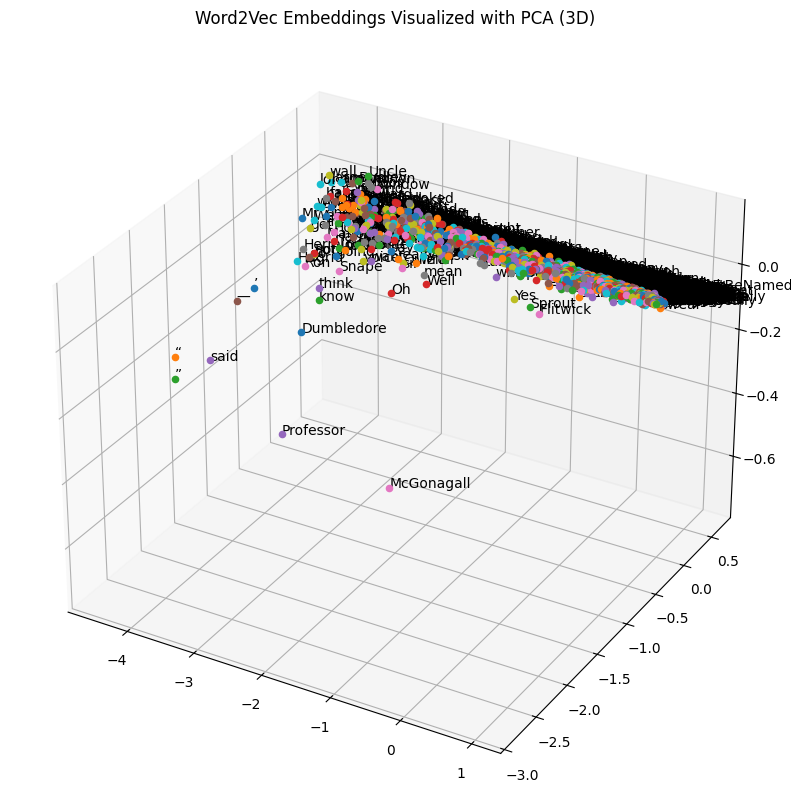

In [133]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(words):
    ax.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2])
    ax.text(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], word)

ax.set_title("Word2Vec Embeddings Visualized with PCA (3D)")
plt.show()